In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)


In [317]:
def getyear(date):
    return int(date[-2:])

cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv")
#cal_fire_data = cal_fire_data[cal_fire_data['Year Built (parcel)'] > 1000]
cal_fire_data['Year'] = cal_fire_data['Incident Month/Year'].apply(getyear)
cal_fire_data = cal_fire_data[cal_fire_data['Year'] > 17]
cal_fire_data['Damage_Level'].value_counts()
cal_fire_data.info()


/var/folders/l1/qgkmnkpx453gnydcmvkyxhh80000gn/T/ipykernel_41122/3455561843.py:4: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 112761 entries, 0 to 130243
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Unnamed: 0                                                    112761 non-null  int64  
 1   * Damage                                                      112761 non-null  object 
 2   * Street Type (e.g. road, drive, lane, etc.)                  99918 non-null   object 
 3   Street Suffix (e.g. apt. 23, blding C)                        58369 non-null   object 
 4   * City                                                        81384 non-null   object 
 5   * CAL FIRE Unit                                               112761 non-null  object 
 6   County                                                        112731 non-null  object 
 7   Community                                                    

In [318]:
from sklearn.model_selection import train_test_split
fire_train, fire_test = train_test_split(cal_fire_data, test_size=0.2, shuffle=True, random_state=216, stratify=cal_fire_data['Damage_Level'])
fire_train['Damage_Level'].value_counts(normalize=True)


Damage_Level
4    0.484990
0    0.464283
1    0.037591
2    0.008536
3    0.004600
Name: proportion, dtype: float64

* Street Type (e.g. road, drive, lane, etc.)
Road         37986
Drive        18646
Lane          9802
Avenue        8878
Street        8736
Way           4156
Court         2623
Other         1852
Place         1351
Trail         1339
Circle        1199
Boulevard     1199
Highway        943
Route          362
Terrace        297
Loop           246
Hwy            175
Parkway         79
Alley           48
                 1
Name: count, dtype: int64


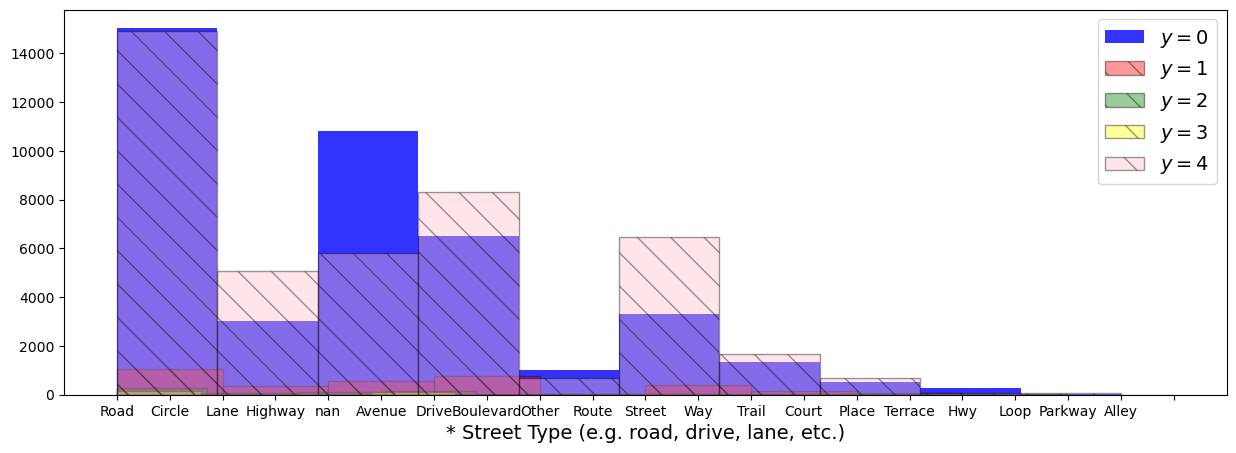

In [319]:
print(cal_fire_data['* Street Type (e.g. road, drive, lane, etc.)'].value_counts())

plt.figure(figsize=(15,5))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['* Street Type (e.g. road, drive, lane, etc.)'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['* Street Type (e.g. road, drive, lane, etc.)'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['* Street Type (e.g. road, drive, lane, etc.)'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['* Street Type (e.g. road, drive, lane, etc.)'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['* Street Type (e.g. road, drive, lane, etc.)'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("* Street Type (e.g. road, drive, lane, etc.)", fontsize=14)
plt.legend(fontsize=14)

plt.show()


Street Suffix (e.g. apt. 23, blding C)
A             12424
B             11727
blding B       5180
blding A       5164
C              4027
Blding A       2797
Blding B       2747
D              1680
E               860
blding C        795
blding B        499
blding A        470
F               467
Building A      464
Building B      446
Blding C        382
G               302
H               211
blding D        196
I               165
Building C      136
Blding D        131
J               115
blding E         98
K                97
Bldg. B          83
Bldg. A          81
Blding E         76
L                75
M                68
N                65
b                62
a                61
Building D       55
blding F         54
Bldg A           53
P                51
O                50
Bldg B           45
2                45
Q                44
blding G         44
Blding F         44
1                43
3                42
blding C         42
5                38
12               37
R

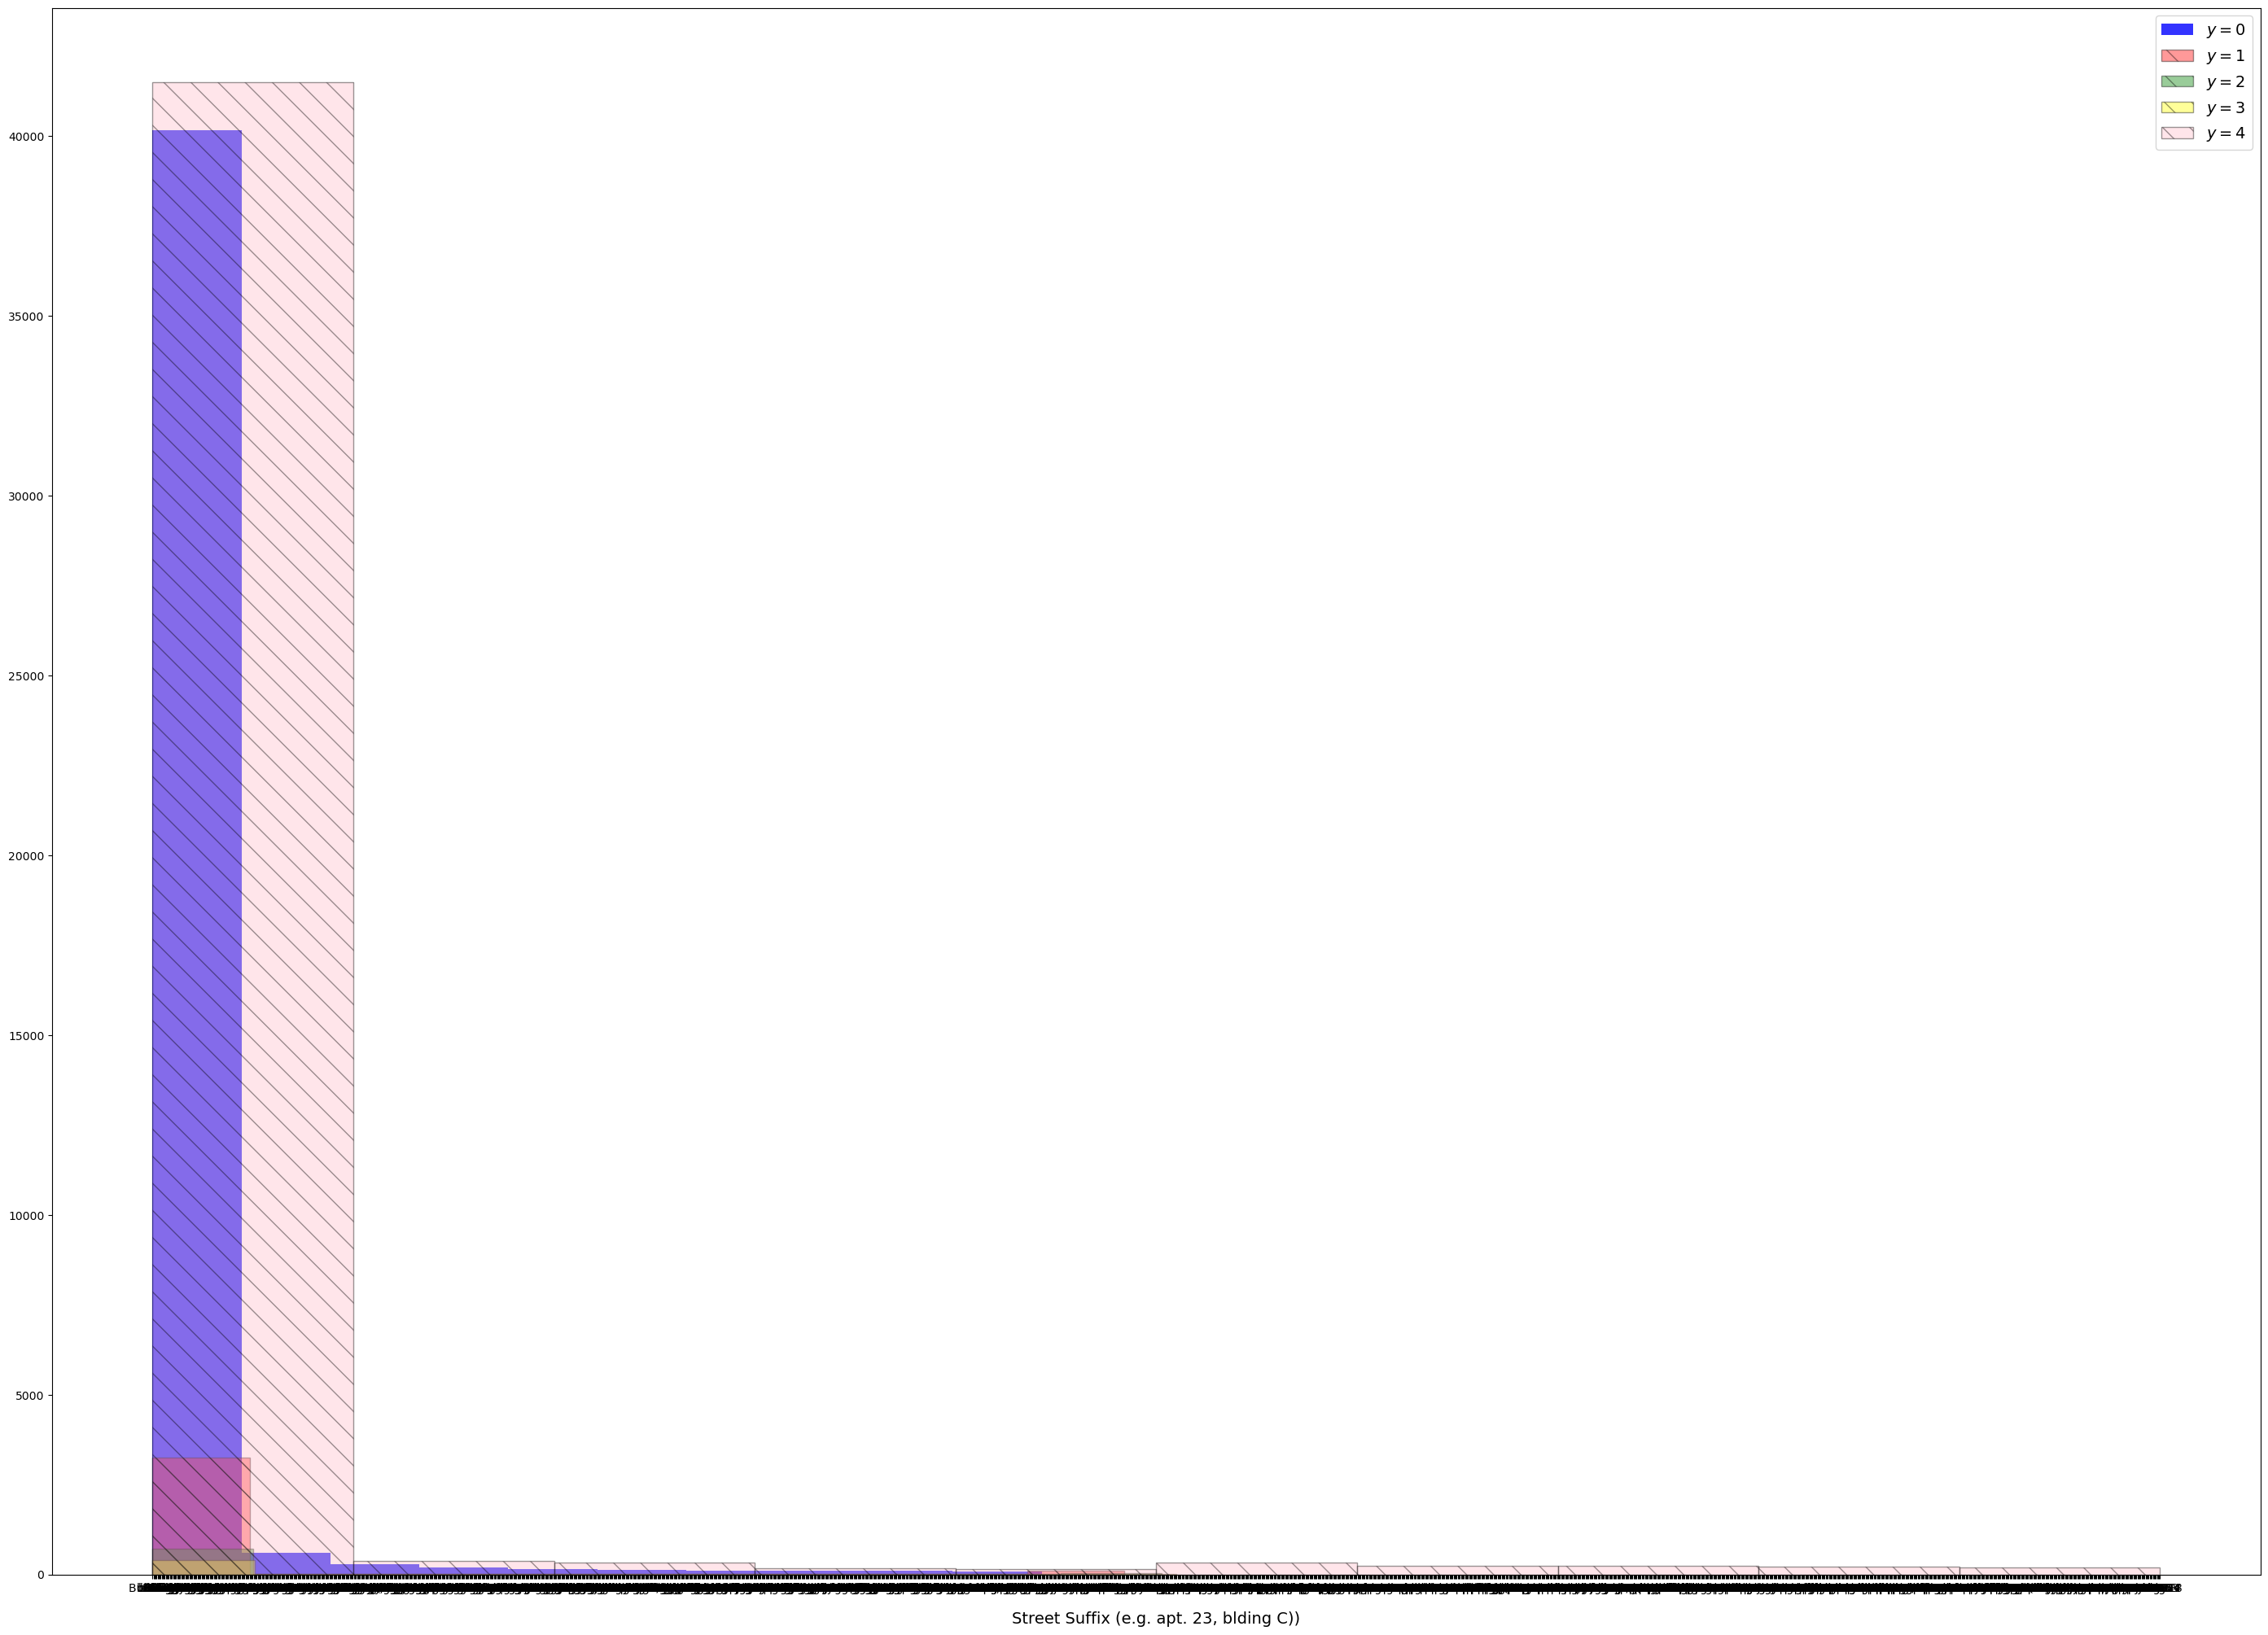

In [320]:
print(cal_fire_data['Street Suffix (e.g. apt. 23, blding C)'].value_counts())

plt.figure(figsize=(35,25))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['Street Suffix (e.g. apt. 23, blding C)'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['Street Suffix (e.g. apt. 23, blding C)'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['Street Suffix (e.g. apt. 23, blding C)'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['Street Suffix (e.g. apt. 23, blding C)'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['Street Suffix (e.g. apt. 23, blding C)'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("Street Suffix (e.g. apt. 23, blding C))", fontsize=14)
plt.legend(fontsize=14)

plt.show()


* City
Altadena                        14951
Pacific Palisades                9022
Unincorporated                   7398
Malibu                           3645
Magalia                          2727
Pasadena                         2404
Paradise Northwest B             1776
Paradise Central Southwest B     1574
Greenville                       1530
Paradise Central Southeast A     1510
Paradise Southwest B             1440
South Lake Tahoe                 1339
Paradise Southeast B             1333
Paradise Central Southwest A     1299
Paradise Central Southeast B     1223
Camarillo                        1139
Paradise Southeast A             1116
Paradise Northwest A             1040
Paradise Northeast A              982
Paradise Northeast B              916
Sierra Madre                      874
Los Angeles County                857
Mariposa                          848
Grizzly Flats                     781
Cohasset                          772
Redding                           765
Conco

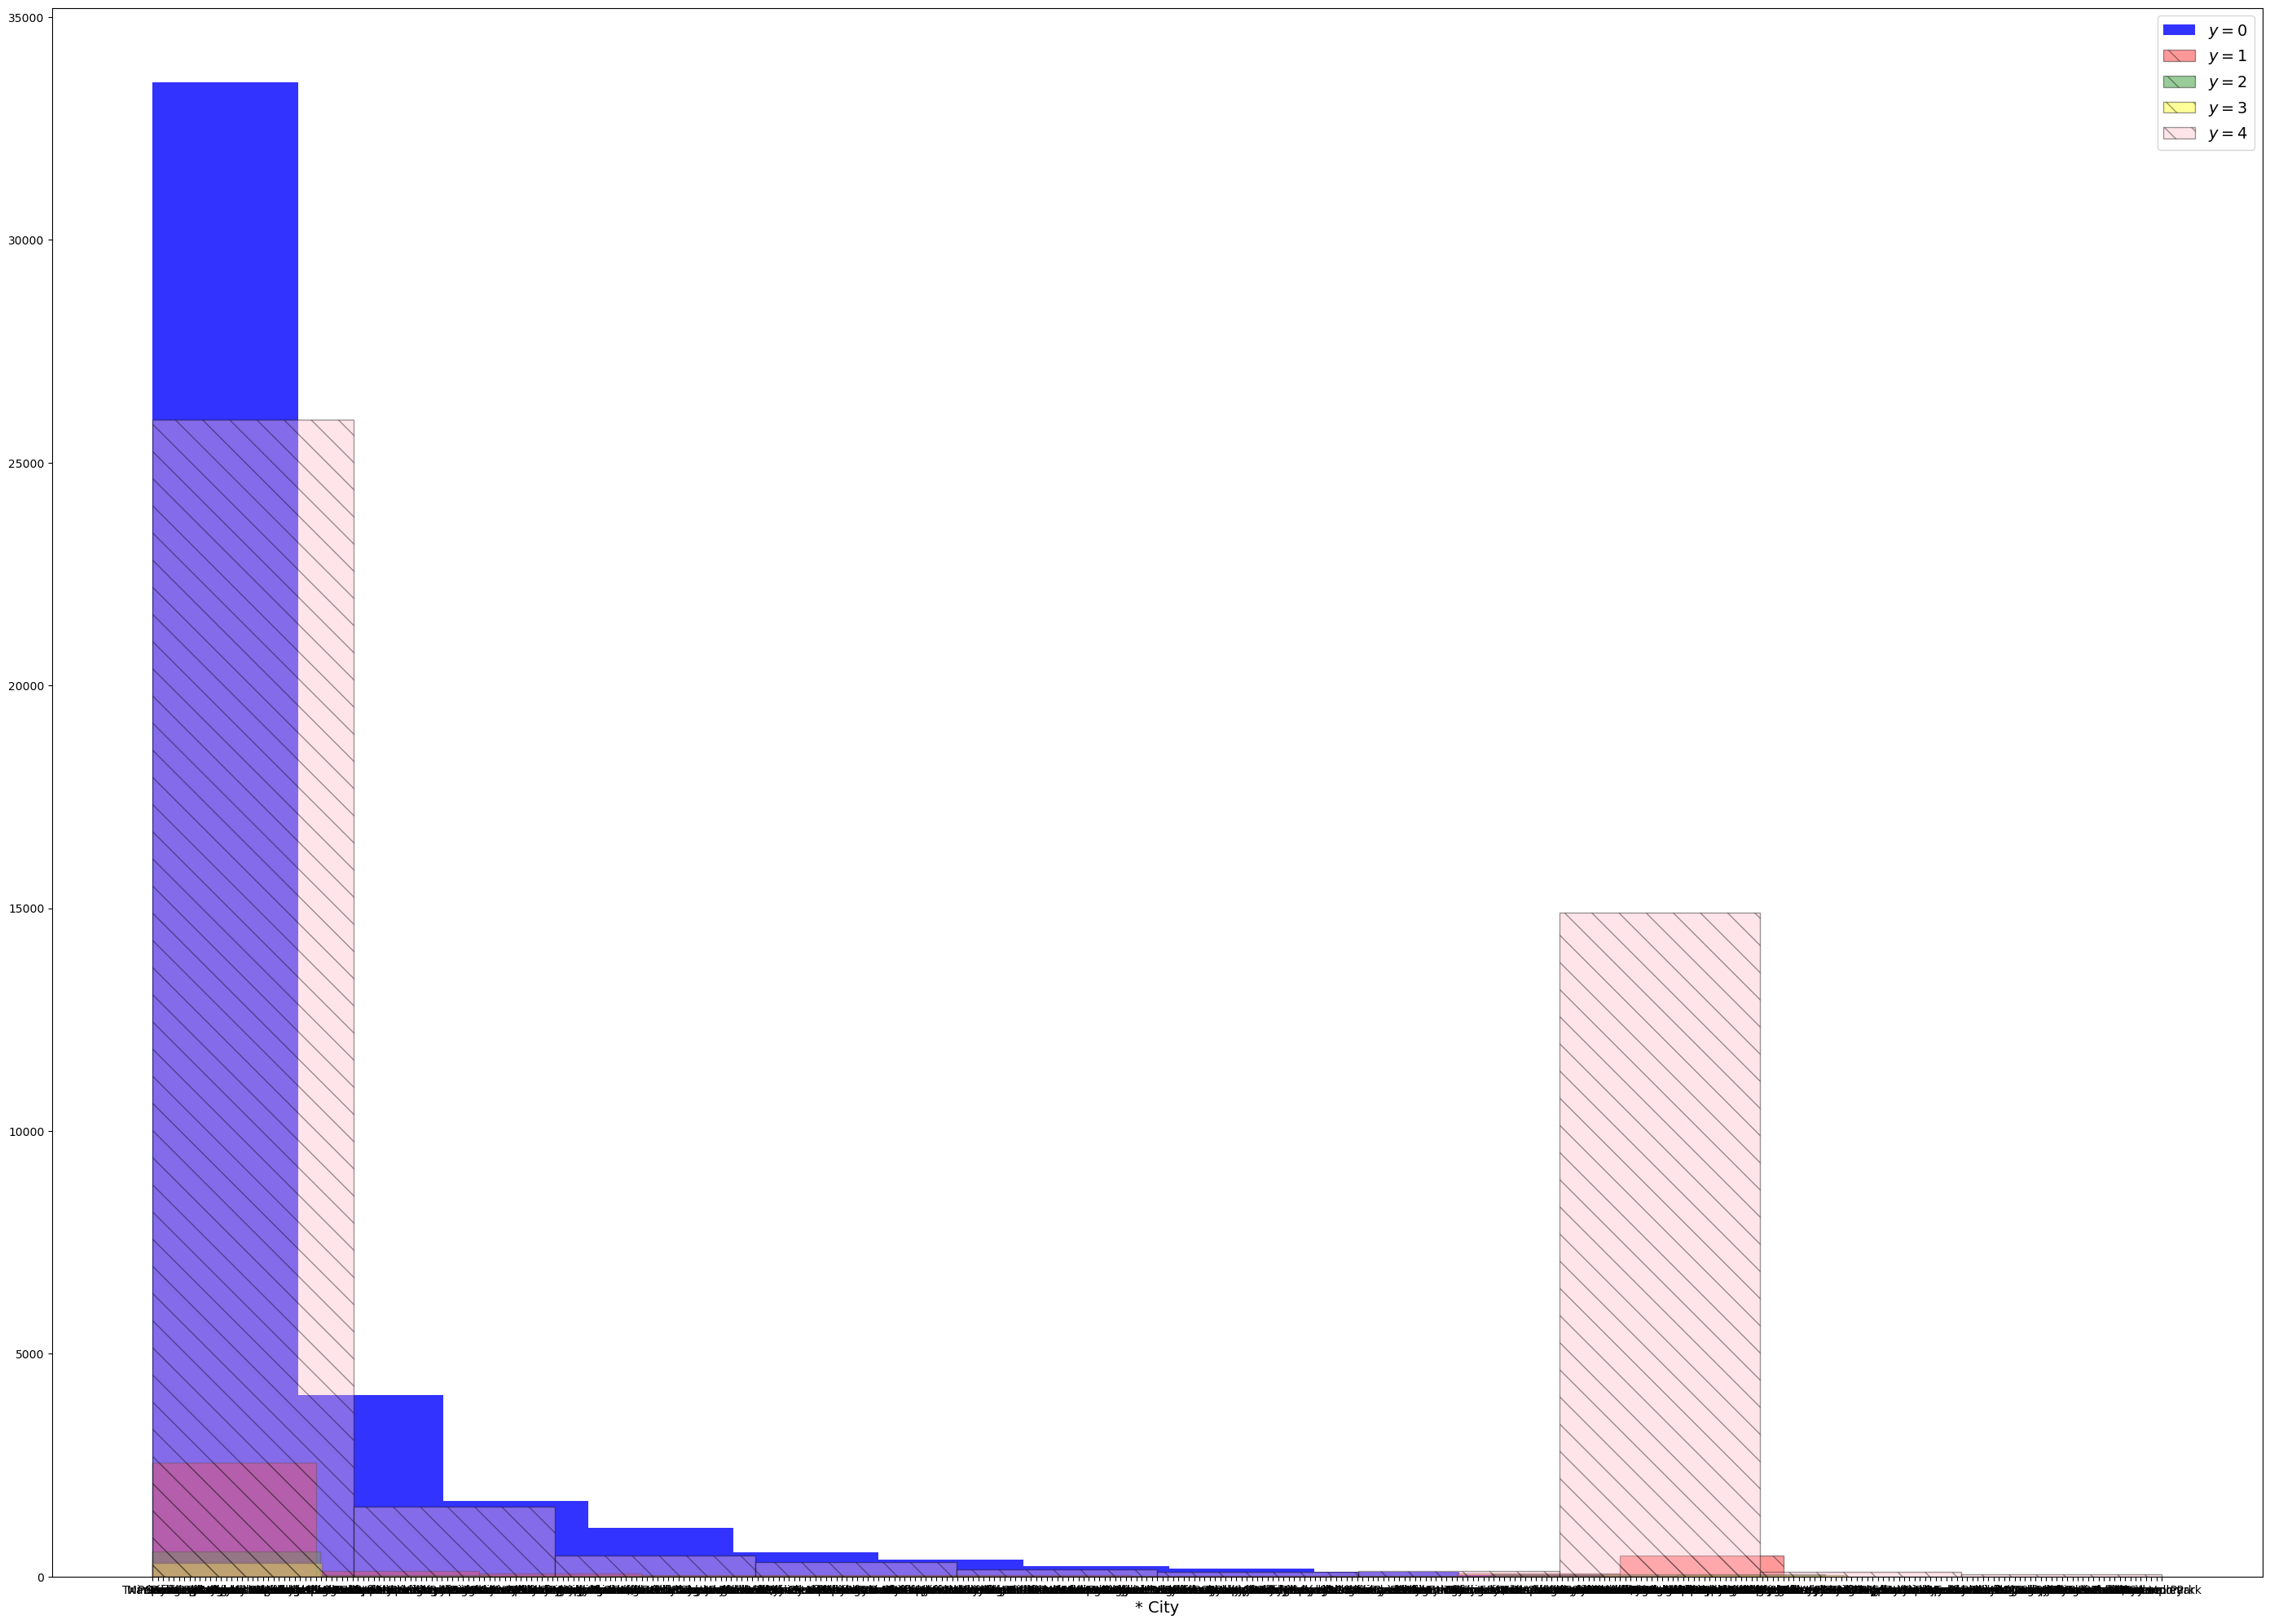

In [321]:
print(cal_fire_data['* City'].value_counts())

plt.figure(figsize=(35,25))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['* City'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['* City'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['* City'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['* City'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['* City'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("* City", fontsize=14)
plt.legend(fontsize=14)

plt.show()


* CAL FIRE Unit
LAC    33881
BTU    28527
LNU    12197
AEU     5152
CZU     4762
LMU     4539
SHU     3812
FKU     2907
ORC     2424
VNC     2136
MMU     1694
SKU     1430
RRU     1162
TGU     1096
KRN     1055
TUU     1017
NEU      944
BDU      935
SCU      890
BEU      649
MVU      638
MEU      355
SBC      209
TCU      188
HUU      137
SLU       15
SDU       10
Name: count, dtype: int64


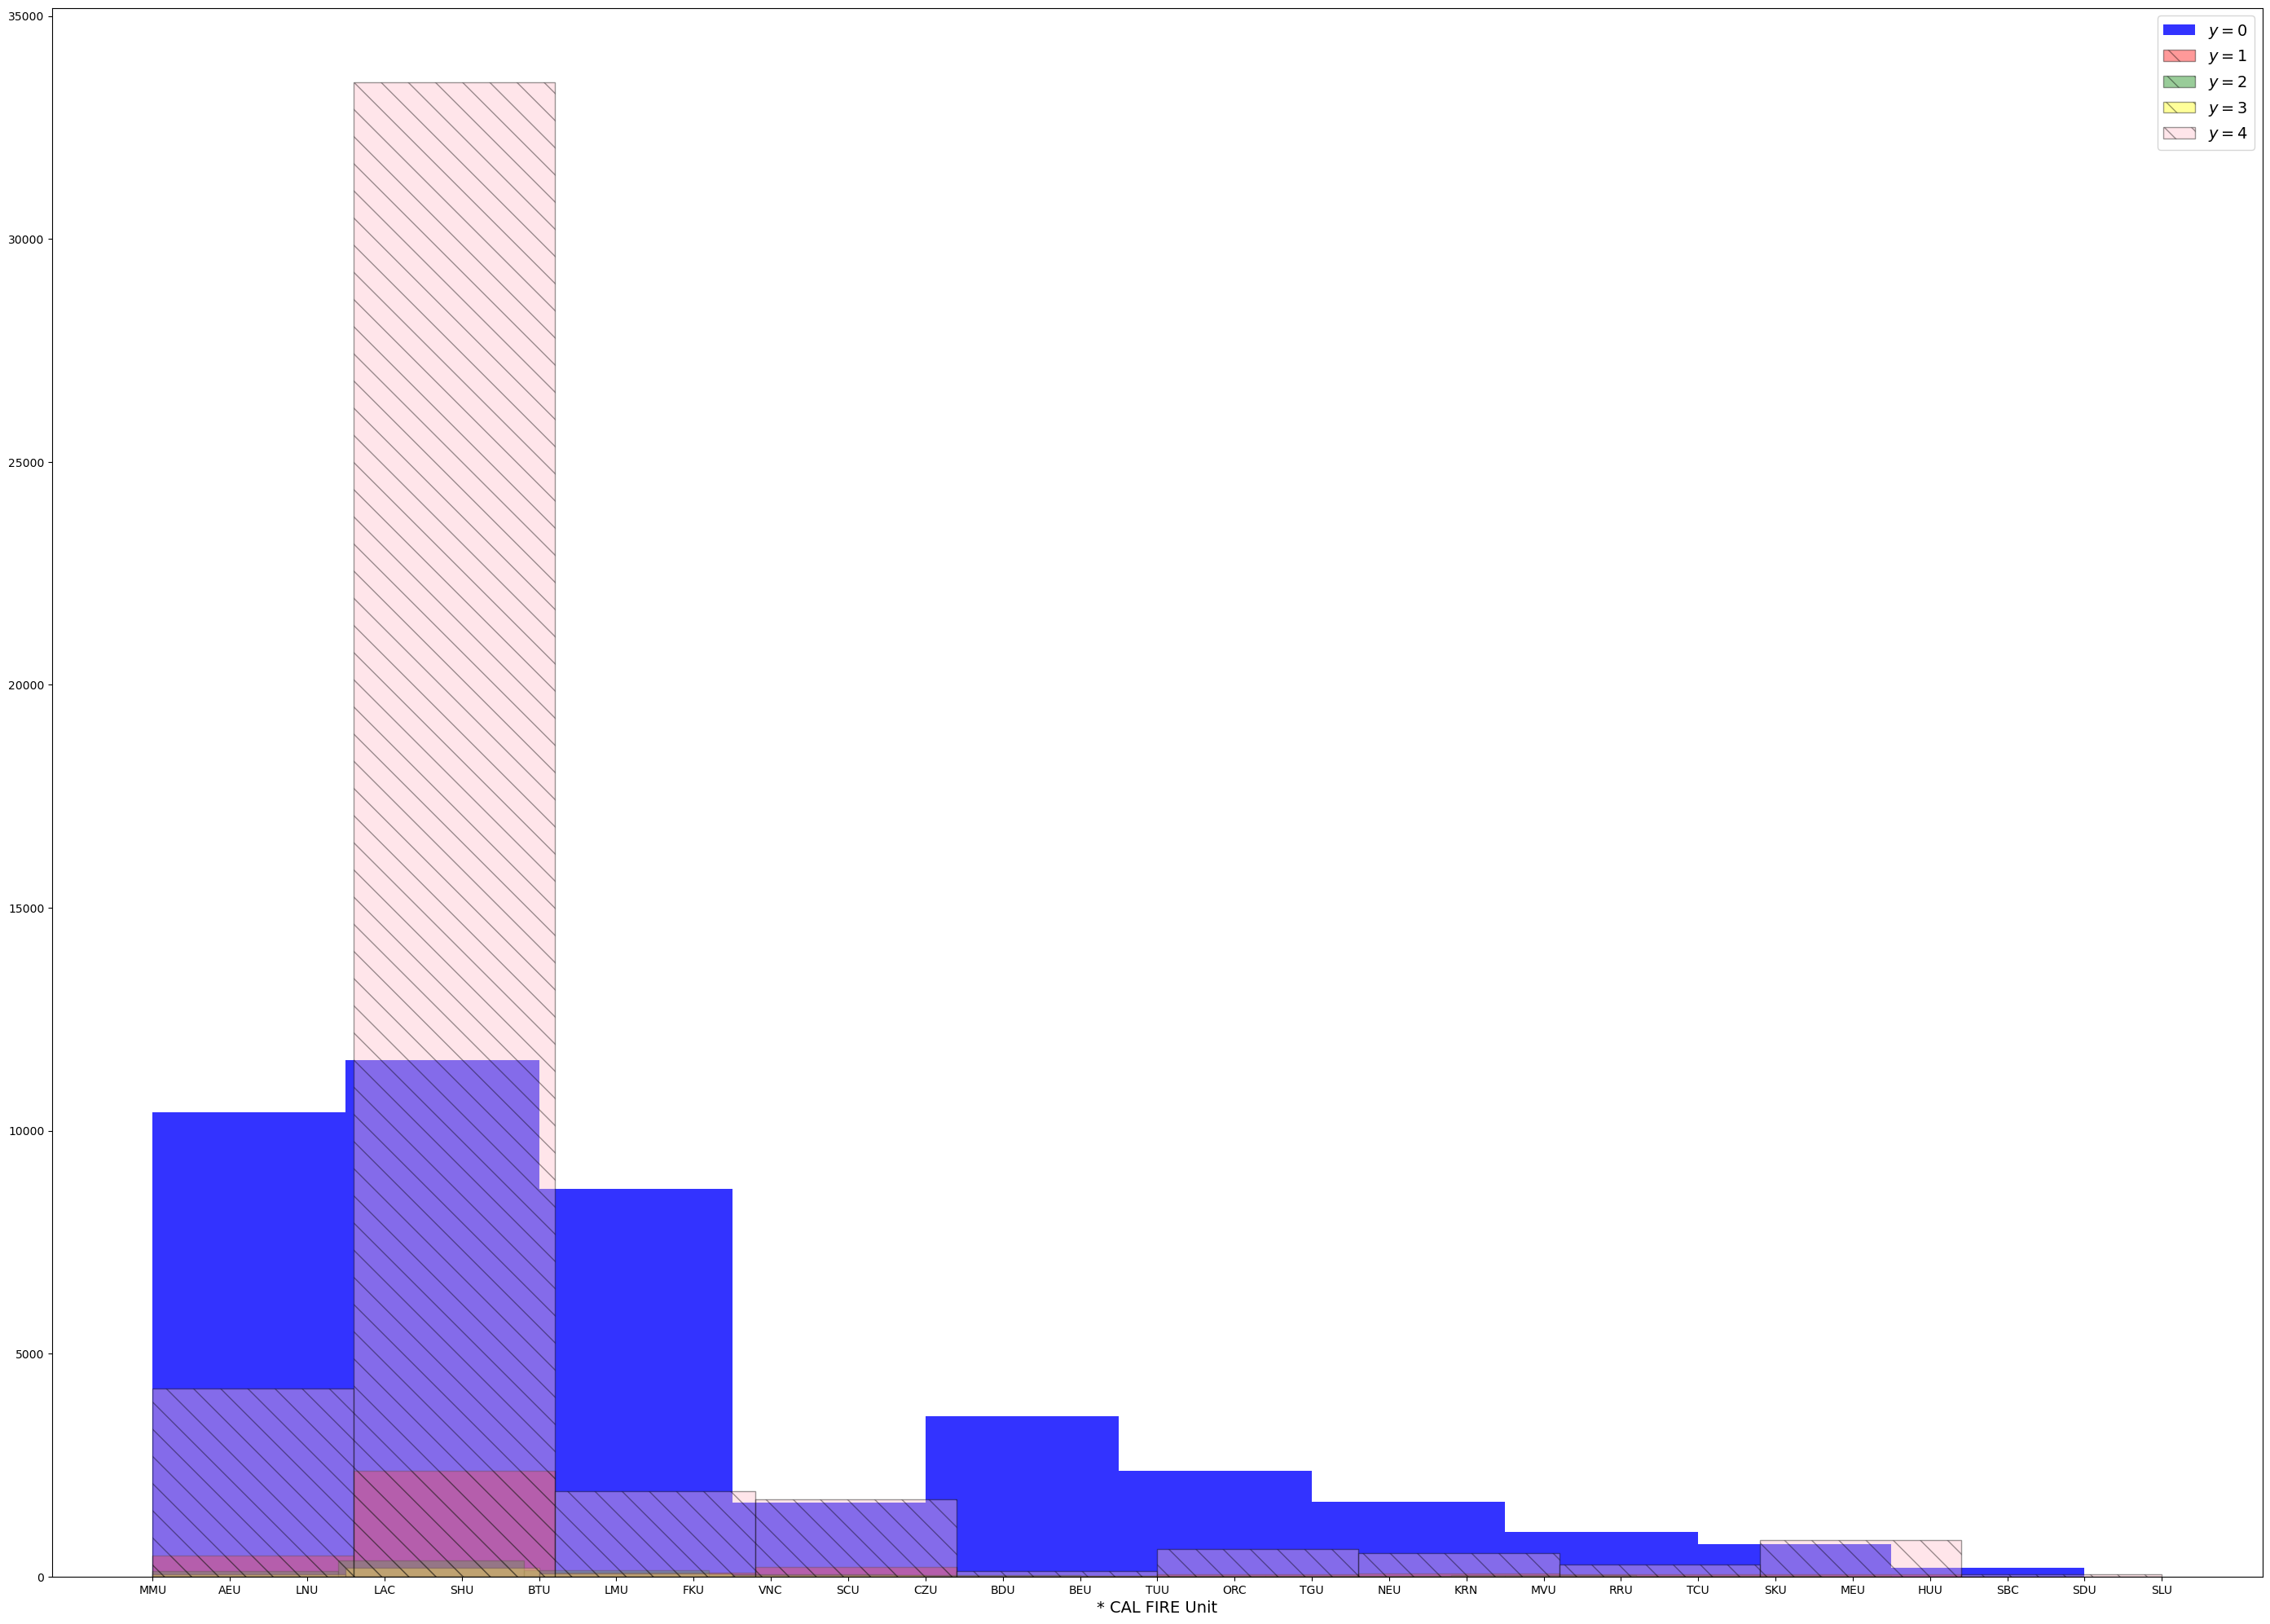

In [322]:
print(cal_fire_data['* CAL FIRE Unit'].value_counts())

plt.figure(figsize=(35,25))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['* CAL FIRE Unit'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['* CAL FIRE Unit'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['* CAL FIRE Unit'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['* CAL FIRE Unit'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['* CAL FIRE Unit'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("* CAL FIRE Unit", fontsize=14)
plt.legend(fontsize=14)

plt.show()


County
Los Angeles        33881
Butte              28469
El Dorado           4637
Napa                4578
Santa Cruz          4558
Sonoma              4485
Plumas              3576
Shasta              3513
Fresno              2907
Orange              2424
Solano              2310
Ventura             2136
Siskiyou            1430
Riverside           1151
Tehama              1108
Kern                1055
Tulare              1015
Mariposa             974
Lassen               957
San Bernardino       917
Madera               720
San Diego            648
Monterey             607
Placer               605
Santa Clara          546
Lake                 495
Trinity              431
Alpine               414
Mendocino            346
Yolo                 278
Nevada               276
Santa Barbara        209
San Mateo            204
Stanislaus           170
Calaveras            125
Alameda              120
San Joaquin           89
Amador                78
Colusa                52
Glenn             

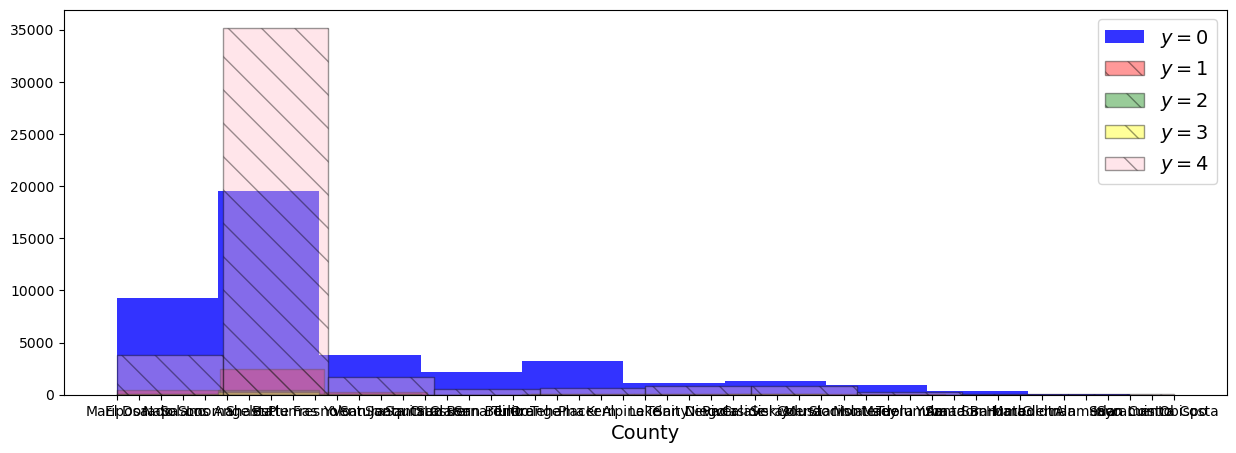

In [323]:
print(cal_fire_data['County'].value_counts())

plt.figure(figsize=(15,5))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['County'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['County'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['County'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['County'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['County'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("County", fontsize=14)
plt.legend(fontsize=14)

plt.show()


Community
Paradise                                                                             7457
Paradise                                                                             7366
Magalia                                                                              1804
Magalia                                                                               946
Berry Creek                                                                           819
Greenville                                                                            815
Malibu                                                                                714
Healdsburg                                                                            586
Irvine                                                                                565
Altadena                                                                              520
Redding                                                                               499


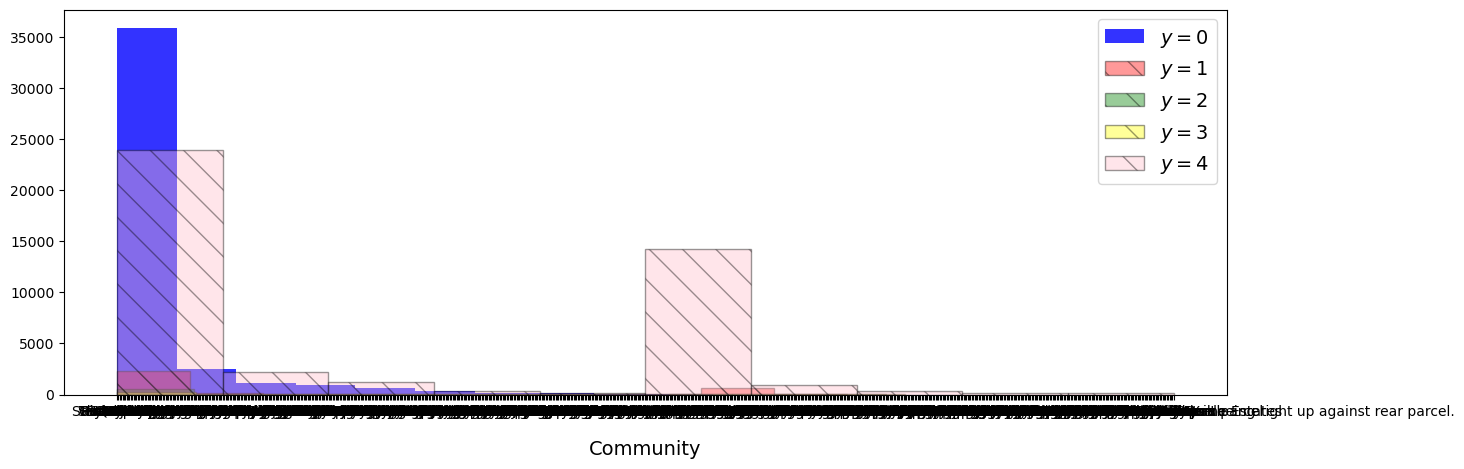

In [324]:
print(cal_fire_data['Community'].value_counts())

plt.figure(figsize=(15,5))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['Community'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['Community'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['Community'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['Community'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['Community'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("Community", fontsize=14)
plt.legend(fontsize=14)

plt.show()


* Incident Name
Camp                   23624
Eaton                  18382
Palisades              12070
LNU Lightning Cmplx     5110
CZU Lightning Cmplx     4762
Glass                   4762
Caldor                  4442
Dixie                   3831
Creek                   3264
North Complex           3204
Park                    2092
Woolsey                 2007
Mountain                1893
Carr                    1890
Kincade                 1568
Silverado               1314
Bridge                   901
SCU Lightning Cmplx      878
SQF Complex              798
Oak                      753
Fawn                     728
Franklin                 728
Mosquito                 666
French                   606
BEU Lightning Cmplx      589
Bond                     565
Zogg                     554
River                    532
Beckwourth               508
Borel                    505
Slater                   435
Valley                   432
Tamarack                 395
Airport                  37

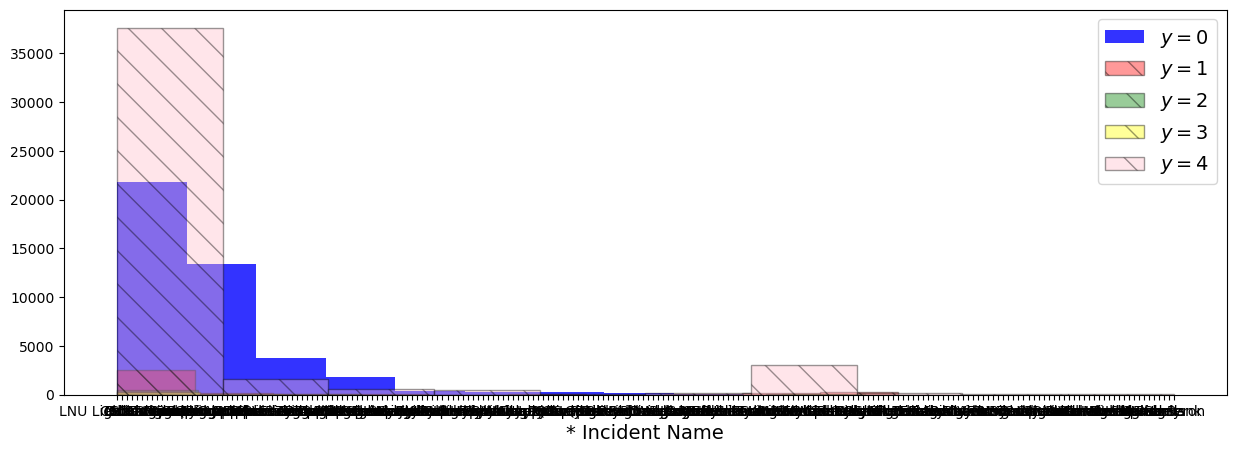

In [325]:
print(cal_fire_data['* Incident Name'].value_counts())

plt.figure(figsize=(15,5))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['* Incident Name'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['* Incident Name'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['* Incident Name'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['* Incident Name'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['* Incident Name'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("* Incident Name", fontsize=14)
plt.legend(fontsize=14)

plt.show()


Age
2025.0    9065
78.0      2431
77.0      1992
75.0      1904
46.0      1708
47.0      1631
45.0      1625
125.0     1520
48.0      1513
76.0      1488
79.0      1422
35.0      1337
36.0      1318
100.0     1265
74.0      1264
60.0      1262
52.0      1260
62.0      1253
65.0      1233
69.0      1231
63.0      1214
38.0      1168
70.0      1162
73.0      1160
53.0      1156
72.0      1137
49.0      1121
50.0      1115
37.0      1110
85.0      1109
61.0      1095
51.0      1063
44.0      1044
34.0      1018
39.0       975
41.0       939
33.0       933
67.0       926
22.0       923
101.0      908
54.0       903
71.0       889
99.0       867
40.0       851
20.0       826
30.0       817
68.0       808
43.0       806
21.0       803
55.0       799
66.0       783
84.0       782
32.0       764
64.0       756
31.0       730
42.0       713
102.0      712
59.0       700
27.0       690
95.0       660
56.0       649
26.0       644
57.0       642
19.0       642
23.0       628
97.0       625
28.0  

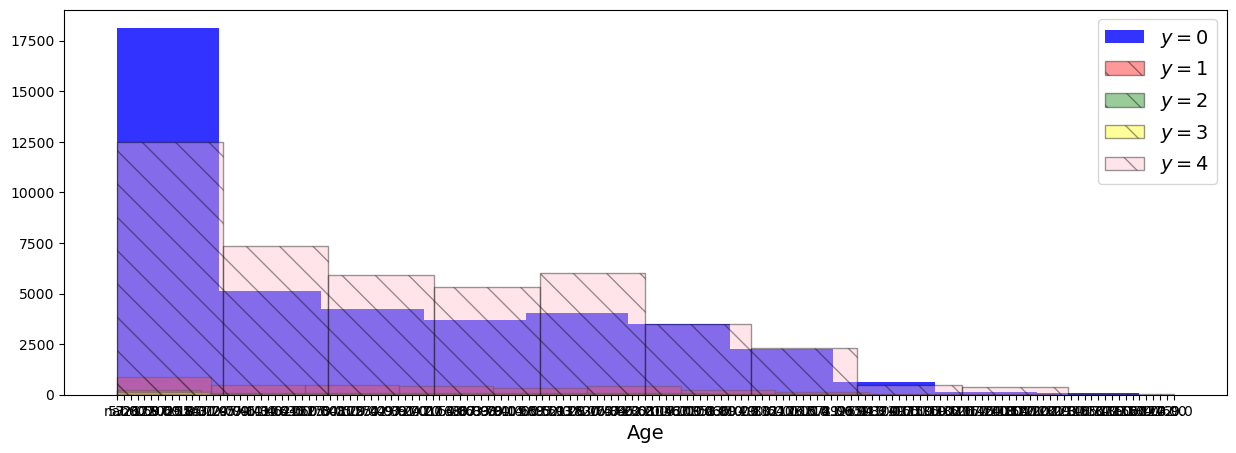

In [326]:
print(cal_fire_data['Age'].value_counts())

plt.figure(figsize=(15,5))


plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==0]['Age'].values],
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==1]['Age'].values],
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==2]['Age'].values],
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==3]['Age'].values],
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist([str(s) for s in fire_train.loc[fire_train.Damage_Level==4]['Age'].values],
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("Age", fontsize=14)
plt.legend(fontsize=14)

plt.show()
